# INDIVIUAL PROJECT

# (1) Data Description

## Summary of Player.csv

- **Description**: This dataset contains information about individual players.
- **Number of observations**: 149
- **Number of variables**: 8
- **Variables**:
  - experience: Player's experience level (categorical: Beginner, Amateur, et cetewra).
  - subscribe: Whether the player subscribed to the newsletter (boolean: True/FAlse).
  - hashedEmail: Unique for each player (hashed email, string).
  - played_hours: Total hours the player has played (numeric).
  - name: Player name (string).
  - gender: Player's gender Categories Male, Female, and others).
  - Age: Player's age (numeric).

## Summary of sessions.csv
- **Description**: This dataset contains details of individual sessions played by each player.
- **Number of observations (row)**: thousands+.
- **Number of variables**: 5
- **Variables**:
  - hashedEmail: Unique  for each player (hashed email, string).
  - start_time: Start time of session (timestamp).
  - end_time: End time of a session (timestamp).
  - original_start_time: Unix timestamp of the session's start time (numeric).
  - original_end_time: Unix timestamp of the session's end time (numeric).

## Issues with data

1. Missing values in Age (N/A)
2. extreme outliers in played_hours
3. Duplicate sessions in sessions.csv need to be fixed.
4. start_time and end_time need to be converted from string to date and time.

# (2) Question 1:
## What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

### Can "expierence, played_hours and age predict wheter or not a player will subscribe to the newsletter??

I picked this question because understanding which player real life attributes influence subscription to the newsletter can optimize recruitment and retention strategies. This analysis will allow me to tArget players who are much more likely to subscribe to the newspaper.

** Response Vairiable** : subscribe (true or false)

** Explanatory Variables** : experience (categoric), played_hours (numeric), age (numeric)

## I am the Data Wrangler
1. Extract columns subscribe, experience, played_hours, age
2. Handle missing or invalid values

# (3) Exploratory Data Analysis and Visualization

In [40]:
# load data check for issues and see first few rows

library(tidyverse)

players <- read.csv("data/players.csv")
sessions <- read.csv("data/sessions.csv")

head(players)
head(sessions)

colSums(is.na(players))
colSums(is.na(sessions))

,experience,subscribe,hashedEmail,played_hours,name,gender,Age
,<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
1,Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
2,Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
3,Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
4,Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
5,Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
6,Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


,hashedEmail,start_time,end_time,original_start_time,original_end_time
,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
2,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
3,f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
4,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
5,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
6,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


experience    subscribe  hashedEmail played_hours         name       gender 
           0            0            0            0            0            0 
         Age 
           2

hashedEmail          start_time            end_time original_start_time 
                  0                   0                   0                   0 
  original_end_time 
                  2

### Find mean vlaue

In [41]:
mean_played_hours <- mean(players$played_hours, na.rm = TRUE)
mean_age <- mean(players$Age, na.rm = TRUE)

cat("Mean Played Hours:", mean_played_hours, "\n")
cat("Mean Age:", mean_age, "\n")

Mean Played Hours: 5.845918 
Mean Age: 20.52062 


## Visualization 1: Distribution of Played Hours by Subscription Status

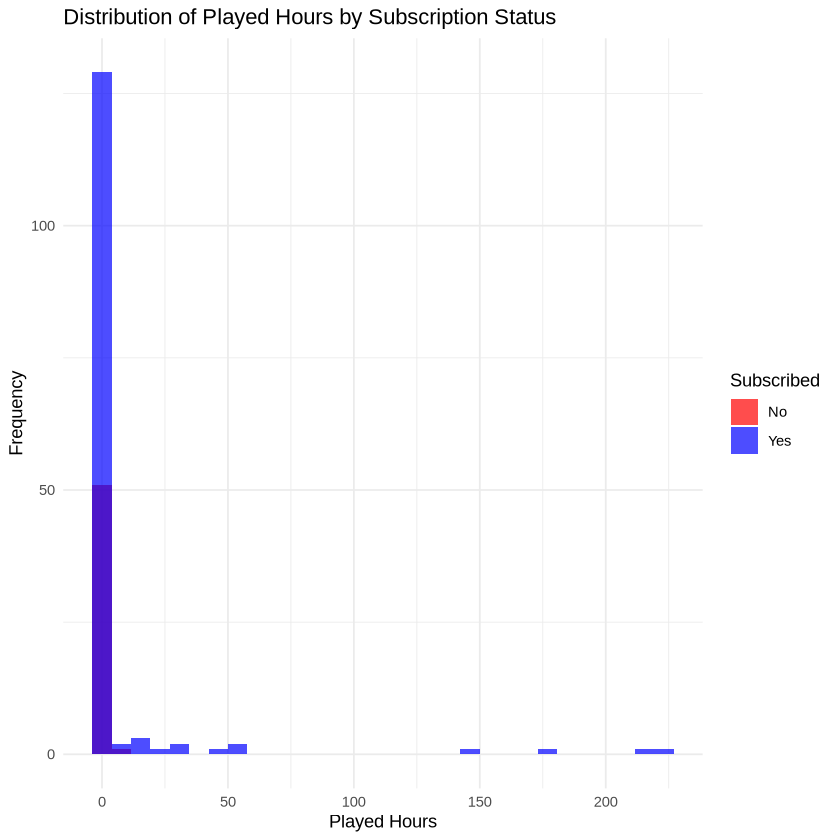

In [46]:
#histogram
# why are they barely playing the game :(

ggplot(players, aes(x = played_hours, fill = as.factor(subscribe))) +
  geom_histogram(bins = 30, alpha = 0.7, position = "identity") +
  scale_fill_manual(values = c("red", "blue"), labels = c("No", "Yes")) +
  labs(title = "Distribution of Played Hours by Subscription Status",
       x = "Played Hours",
       y = "Frequency",
       fill = "Subscribed") +
  theme_minimal()

### Analysis

Players who played more hours are more likely to subscribe to the news and vice versa.

The total hours a player plays minecraft might indicate how likely they are to subscribe to the newsletter. This is useful for marketing as the ubc cpsc team should focus on targeting players with higher hours on the video game.

## Visualization 2: Subscription Rate by Experience Level

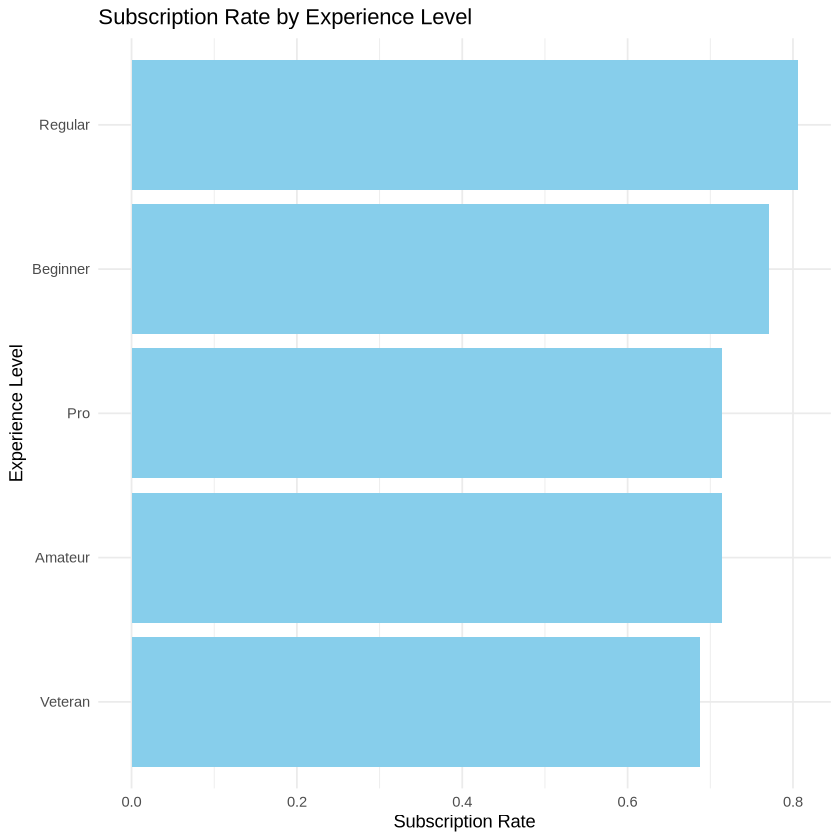

In [44]:
experience_subscription <- players |>
  group_by(experience) |>
  summarize(subscription_rate = mean(subscribe == "TRUE", na.rm = TRUE))

ggplot(experience_subscription, aes(x = reorder(experience, subscription_rate), y = subscription_rate)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Subscription Rate by Experience Level",
       x = "Experience Level",
       y = "Subscription Rate") +
  theme_minimal() +
  coord_flip()

### Analysis

Players with regular status are the most likely to subscribe to the newsletter, followed by regulars, beginners, pros, amateurs and finally veterans.

This suggests that Regulars and beignners who both subscribe at over 75% of the time are the target audience as they are large groups with high subscription rates. Veterans may need better content that fits their needs or should be ignore as they have the lwowest subscrition rate at below 70%.

Interesting pattern which may be because regulars are more invested in minecraft compared to beginners + amateurs but not to the point like pros + veterans where they know too much and dont need the help of the newsletter.

# (4) Methods and plan

### Proposed Method
My proposed method for addressing the question is K-Nearest Neigbours (KNN).

### Why is this method appropriate?
KNN assumes that similar observations share the same class based on their distance.

### Which assumptions are required, if any, to apply the method selected?
Numerical values must be scaled using z-score nominalisation to make that a signle variable holds more distance than any other.

The balance of classes is important as the dataset should not have far more subscribes that are false than true or vice versa as this skews the results.

### What are the potential limitations or weaknesses of the method selected?
Sensitivity to outliers that can distort distance so I should use z-score nominalization to standardize data.

Result of method is dependent on choice of k, a small k can overfit the training data but a large k can miss difficult to notice patterns. I should use cross validation to fix this issue

The balance of classes is important as the dataset should not have far more subscribes that are false than true or vice versa as this skews the results.

### How are you going to compare and select the model?
I will use accuracy of observations, precision of predictions, recall and cross-validation to compare and selet the model. This will make a effective peformance evaluation.

###  How are you going to process the data to apply the model? For example: Are you splitting the data? How? How many splits? What proportions will you use for the splits? At what stage will you split? Will there be a validation set? Will you use cross validation?

Splitting data into two sections a training test to train the model and a test set to evaluate the model's performance on unknown data. I could do a 70:30 split of data.

I will split data before any scaling or proccessing of data as to keep the data clean.

I will use cross validation, picking different values of k on the training set. The number that maximises the score will be selected.